# Map Clustering


In [ ]:
# !pip install haversine
# !pip install geopy
# !pip install folium

## Baseline

In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from haversine import haversine
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import scipy.stats as stats
import folium

import warnings
warnings.filterwarnings("ignore")

In [10]:
addresses = ['서울시 도봉구 방학로6길 25', 
           '서울시 도봉구 덕릉로63길 19',
           '서울시 도봉구 해등로 133',
           '서울시 도봉구 방학로3길 16',
           '서울시 도봉구 도봉로133길 42',
           '서울시 도봉구 덕릉로59나길 20',
           '서울시 도봉구 해등로16가길 32',
           '서울시 도봉구 우이천로34길 38',
           '서울시 도봉구 노해로 41길 9',
           '서울시 도봉구 도봉로 969',
           '서울시 도봉구 방학1동 마들로 656']



In [20]:
def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = (float(geo.latitude), float(geo.longitude))

    return crd

def geo_df_coding(addresses):
    geo_list = []
    for address in addresses:
        crd = geocoding(address)
        geo_list.append(crd)
    geo_df = pd.DataFrame(geo_list)
    geo_df.columns = ['latitude', 'longitude']
    
    return geo_df

In [22]:
geo_df = geo_df_coding(addresses)
locations = list(zip(geo_df['latitude'], geo_df['longitude']))

In [26]:
# 주소 지점 위치
m = folium.Map(location = [locations[0][0], locations[0][1]], zoom_start=14)

for i in range(len(locations)):
    folium.Marker([float(locations[i][0]), float(locations[i][1])]).add_to(m)
m

## Clustering by K-Means

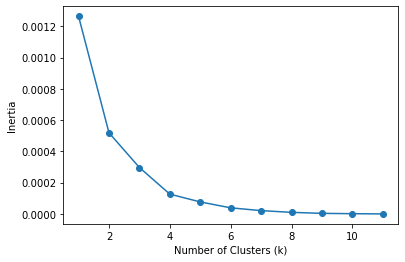

In [31]:
# Determination of K
num_clusters = list(range(1,12))
inertias = []

# 각 k별로 모델을 생성하여 inertia를 측정
for i in num_clusters:
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(geo_df)
    inertias.append(model.inertia_)

# K에 따른 inertia의 변화를 시각화
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel("Inertia")
plt.show()